# 합성곱 신경망 : Convolutional neural network, CNN

기존의 mnist 모델은 이미지의 데이터를 1차원 벡터로 펼쳐서 입력으로 받는 형태였다.<br>
이는 이미지가 가지고있는 2차원적 성질을 잃는 데이터 전처리이다.<br>
이때 사용하는 레이어가 합성곱 레이어이다.

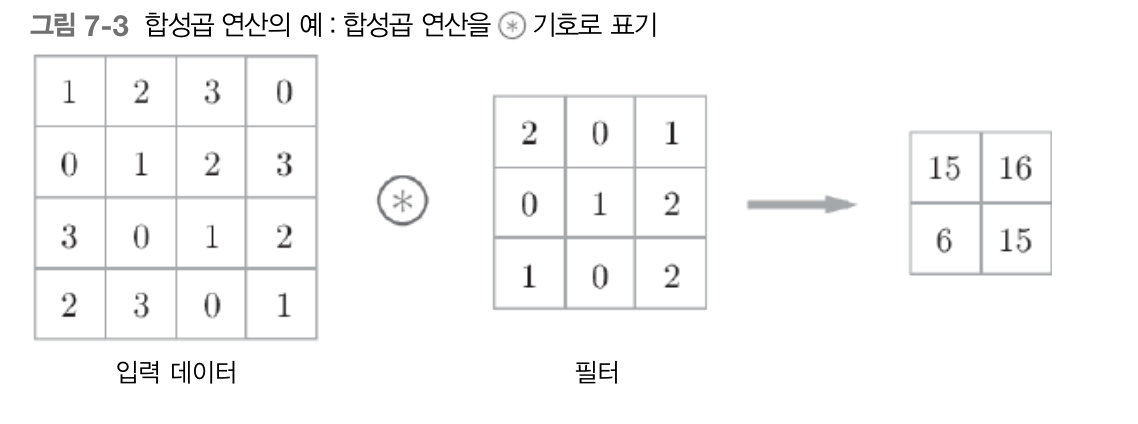

### 새로운 개념
1. Convolution layer
2. filter
3. padding
4. stride
5. pooling 

### Padding
> 패딩은 이미지 주위를 0으로 채우는 방법이다. 필터의 이동 경로를 늘려서 결과적으로 출력되는 결과물(feature map: 특징맵)의 크기, 사이즈를 조절한다.<br> padding=0의 형식으로 키워드 매개변수 형태로 저장되어있고 숫자에 따라 이미지의 겉에 둘러지는 0들의 두께가 달라진다.

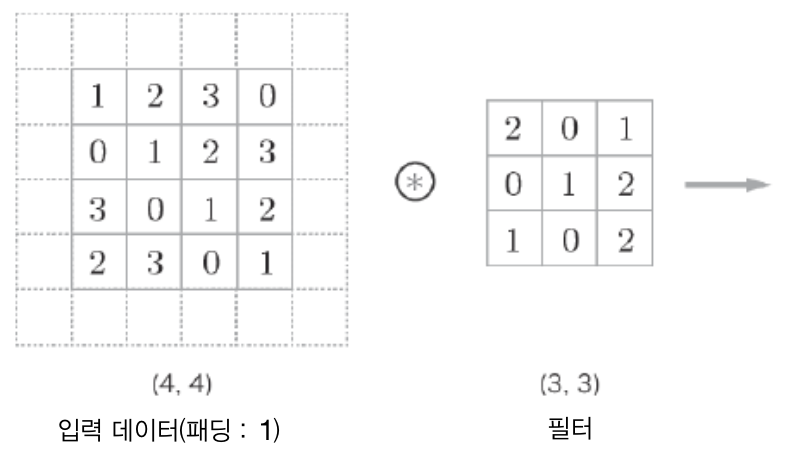

### Stride
> 이는 필터(커널이라고도 부른다.)가 입력 이미지 위를 이동하는 보폭을 조절한다.<br>기본적으로 stride=1이며 stride=2로 설정한다면, 필터는 이미지 위를 두 배 빠르게 훑고 지나갈 것이다.

### (N, C, H, W)
> 이는 입력 이미지의 형상이다. N개의 이미지 데이터가 C(channel)개의 채널수(RGB의 경우 3)를 갖고 한 이미지의 한 채널마다 <br>
H * W(높이 * 너비) 크기의 행렬 데이터를 갖는다. <br>우선 1개의 이미지 샘플을 갖고 필터와 합성곱을 했을 때의 결과를 보자.

### (1, C, H, W) conv (FN, C, FH, FW) = (1, FN, OH, OW)
> 한 개의 이미지를 필터와 합성곱을 한다면 필터의 차원 수는 입력 이미지의 차원 수와 동일해야 한다는 제약이 있다.<br>
그 외에 FN은 출력된 특징맵의 차원수를 결정하고 FH와 FW는 높이와 너비를 결정한다<br>
자세한 연산 과정은 아래 그림으로 나타낸다. (단, 아래 그림은 필터의 개수(FN)을 1로 고정시킨 상태에서의 그림이다.)

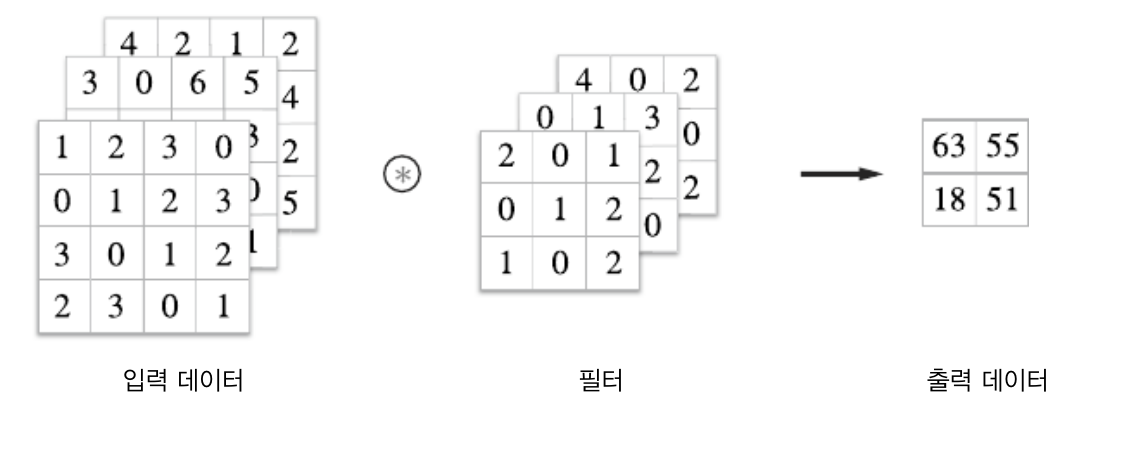
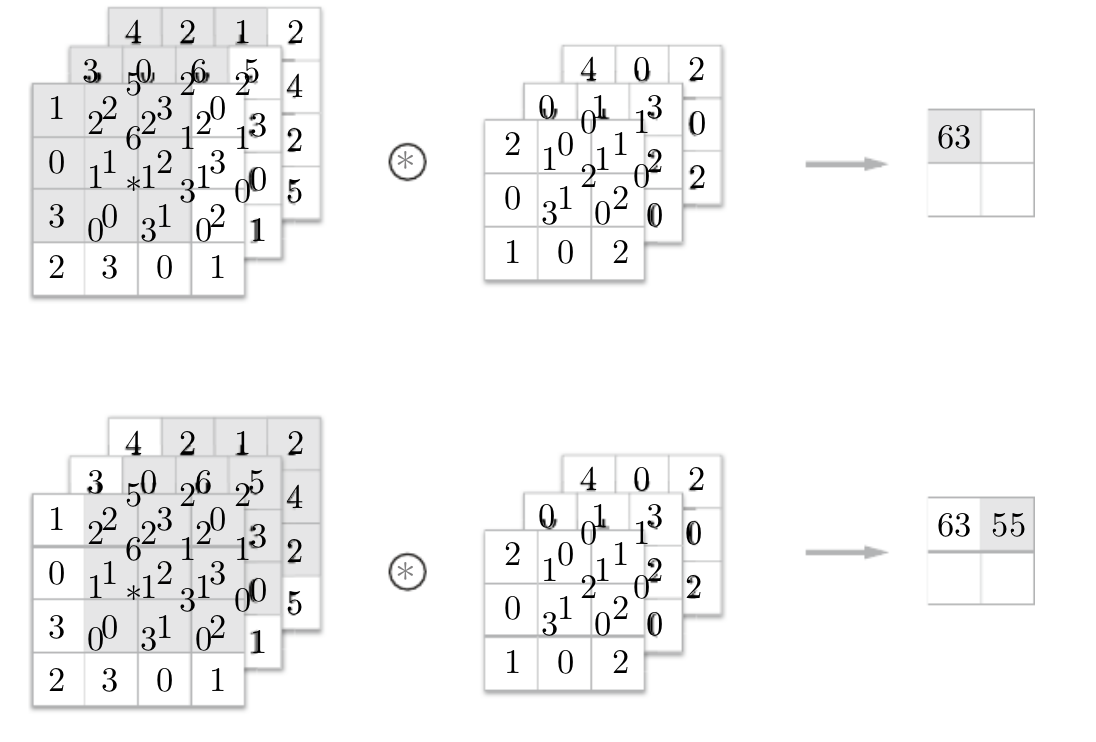

위 그림에서 필터의 개수를 늘리면 그만큼 출력 특징맵의 개수도 늘어날 것이다. 이는 필터의 개수가 출력 특징맵의 채널수임을 알려준다.
편향을 추가한 전체적인 연산 과정은 아래와 같다.

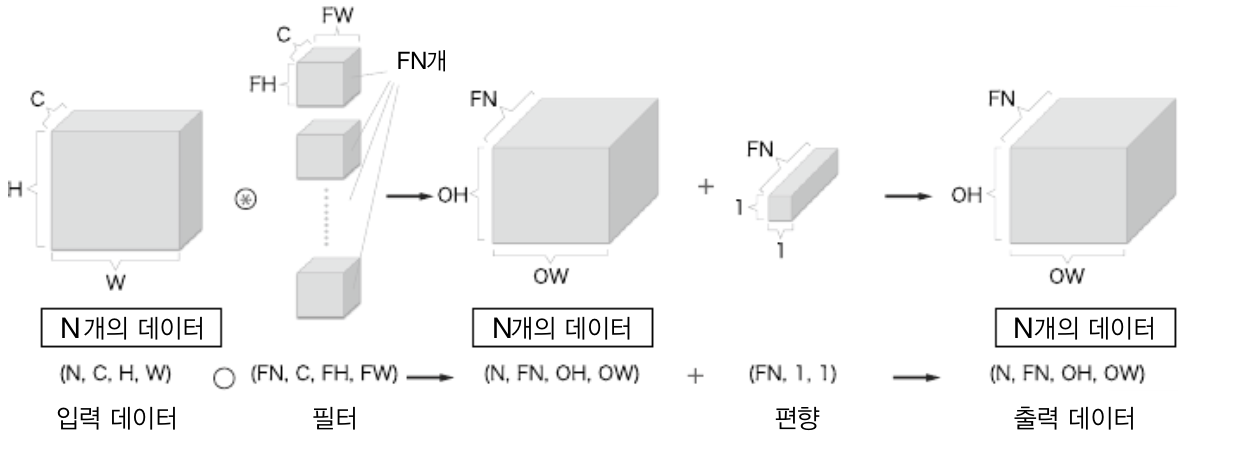

편향을 더할 때에는 브로드캐스팅 연산이 동반된다.

### Pooling
> 풀링 계층은 PCA(주성분 분석)와 같다고 생각하면 편하다. 이미지 픽셀들을 2x2덩어리로 묶은 후 각 덩어리에서 픽셀의 최대값을 추출하는 방식이다.
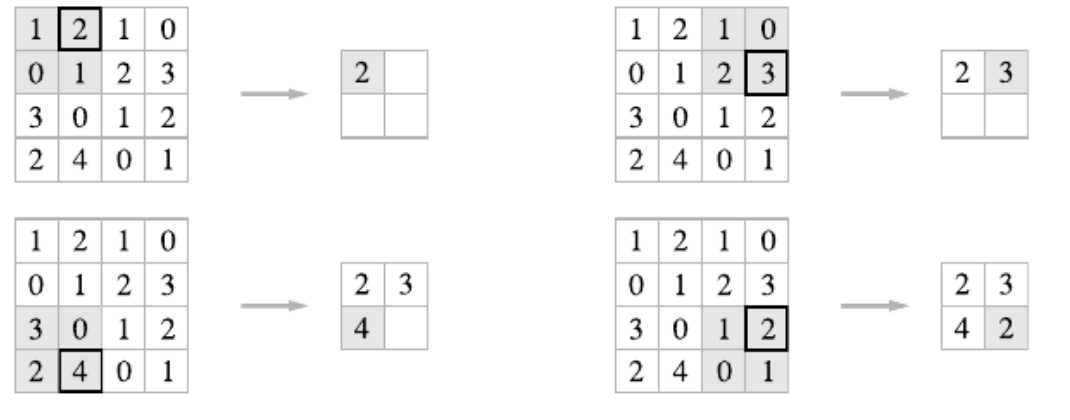
위 그림은 2x2 최대 풀링 방법이다. 이는 학습 파라미터가 없고 채널 수가 변하지 않는다. 중요한 점은 이미지의 크기를 1/2로 줄인다는 것이다.<br>
단 이 방식은 예전 방식이고 요즘에는 strided_conv 방식을 많이 사용한다.<br>
이는 pooling계층의 단점을 보완한 방식이다. (설명은 칠판, 구두로)

### im2col & col2im
> 4차원의 입력값을 행렬곱을 하기 위해 2차원으로 축소시키는 방법. col2im는 im2col의 역연산이 아니라 역전파때 사용하는 함수이다.

In [12]:
import torch

input_data = torch.randint(1, 10,size=(1, 2, 4, 4))

print(input_data)

img = torch.nn.functional.pad(input_data, (1, 1, 1, 1), mode="constant", value=0)

print(img)

col = torch.zeros(1, 2, 3, 3, 4, 4)

for y in range(3):      # filter_h
    y_max = y + 1 * 4   # stride * out_h
    for x in range(3):
        x_max = x + 1 * 4

        # GPU VRAM 내부에서의 고속 복사 (Device Transfer 없음)
        col[:, :, y, x, :, :] = img[:, :, y:y_max:1, x:x_max:1]     # stride=1

print(col)

tensor([[[[6, 7, 8, 7],
          [8, 5, 8, 9],
          [6, 2, 3, 8],
          [7, 3, 4, 4]],

         [[3, 3, 6, 8],
          [9, 4, 5, 7],
          [1, 7, 5, 6],
          [5, 1, 4, 6]]]])
tensor([[[[0, 0, 0, 0, 0, 0],
          [0, 6, 7, 8, 7, 0],
          [0, 8, 5, 8, 9, 0],
          [0, 6, 2, 3, 8, 0],
          [0, 7, 3, 4, 4, 0],
          [0, 0, 0, 0, 0, 0]],

         [[0, 0, 0, 0, 0, 0],
          [0, 3, 3, 6, 8, 0],
          [0, 9, 4, 5, 7, 0],
          [0, 1, 7, 5, 6, 0],
          [0, 5, 1, 4, 6, 0],
          [0, 0, 0, 0, 0, 0]]]])
tensor([[[[[[0., 0., 0., 0.],
            [0., 6., 7., 8.],
            [0., 8., 5., 8.],
            [0., 6., 2., 3.]],

           [[0., 0., 0., 0.],
            [6., 7., 8., 7.],
            [8., 5., 8., 9.],
            [6., 2., 3., 8.]],

           [[0., 0., 0., 0.],
            [7., 8., 7., 0.],
            [5., 8., 9., 0.],
            [2., 3., 8., 0.]]],


          [[[0., 6., 7., 8.],
            [0., 8., 5., 8.],
          

In [13]:
col = col.permute(0, 4, 5, 1, 2, 3).contiguous()    # (N, OH, OW, C, FH, FW)    / 2차원 데이터를 1차원으로 늘리는 과정의 연속

# 6. 2차원으로 펼치기
col = col.view(1 * 4 * 4, -1)       # (N * out_h * out_w, -1)   / 형상의 순서를 잘 기억하고 나중에 잘 분리해주면 된다.

print(col)

tensor([[0., 0., 0., 0., 6., 7., 0., 8., 5., 0., 0., 0., 0., 3., 3., 0., 9., 4.],
        [0., 0., 0., 6., 7., 8., 8., 5., 8., 0., 0., 0., 3., 3., 6., 9., 4., 5.],
        [0., 0., 0., 7., 8., 7., 5., 8., 9., 0., 0., 0., 3., 6., 8., 4., 5., 7.],
        [0., 0., 0., 8., 7., 0., 8., 9., 0., 0., 0., 0., 6., 8., 0., 5., 7., 0.],
        [0., 6., 7., 0., 8., 5., 0., 6., 2., 0., 3., 3., 0., 9., 4., 0., 1., 7.],
        [6., 7., 8., 8., 5., 8., 6., 2., 3., 3., 3., 6., 9., 4., 5., 1., 7., 5.],
        [7., 8., 7., 5., 8., 9., 2., 3., 8., 3., 6., 8., 4., 5., 7., 7., 5., 6.],
        [8., 7., 0., 8., 9., 0., 3., 8., 0., 6., 8., 0., 5., 7., 0., 5., 6., 0.],
        [0., 8., 5., 0., 6., 2., 0., 7., 3., 0., 9., 4., 0., 1., 7., 0., 5., 1.],
        [8., 5., 8., 6., 2., 3., 7., 3., 4., 9., 4., 5., 1., 7., 5., 5., 1., 4.],
        [5., 8., 9., 2., 3., 8., 3., 4., 4., 4., 5., 7., 7., 5., 6., 1., 4., 6.],
        [8., 9., 0., 3., 8., 0., 4., 4., 0., 5., 7., 0., 5., 6., 0., 4., 6., 0.],
        [0., 6.,

In [ ]:
# 필터의 효과 체험

def conv(input, kernel, stride, pad):
    pass